# Walmart: Weekly Sales Prediction

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# Inserting Dataset
dataset = pd.read_csv('Walmart_Store_sales.csv')

# <span style="color:Green">1. Exploratory Analysis and Data Cleaning</span>


In [6]:
# Basic stats
print("Number of rows and columns : {}".format(dataset.shape))
print()

print("Display of dataset: ")
display(dataset.head())
print()

# Calculating the proportion of missing values
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0]) 


Number of rows and columns : (150, 8)

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

From the above we notice that there are some missing values in the 'Weekly_Sales' column. <br/>
Since this is the target column it could be dangerous to fill the missing values, so they will be removed.

On the column Date, the values that are missing are more than 5%, so simple imputation (mean / median) can not be used. <br/>
Also, we can not use a multiple imputation since the dates are not in order, therefore they will be removed. <br/>

These changes will happen on this section and not at Features engineering in order to explore the dataset better.

In [7]:
# Removing the rows that are missing from the Weekly_Sales and Date
dataset = dataset.dropna(subset=["Weekly_Sales", 'Date'])

The Date column can not be included as it is in the model, it would be interesting to create a 'day of the week', 'day', 'month' and 'year' field seperately.

In [8]:
#Making Column Date from string to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# creating 'day of the week', 'day', 'Month' and 'year'
dataset['day_of_week']= dataset['Date'].dt.day_name()
dataset['day']= dataset['Date'].dt.day
dataset['month']= dataset['Date'].dt.month
dataset['year']= dataset['Date'].dt.year
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,Sunday,6,3,2011


### <span style="color:green">Variables Correlation</span>

<AxesSubplot:>

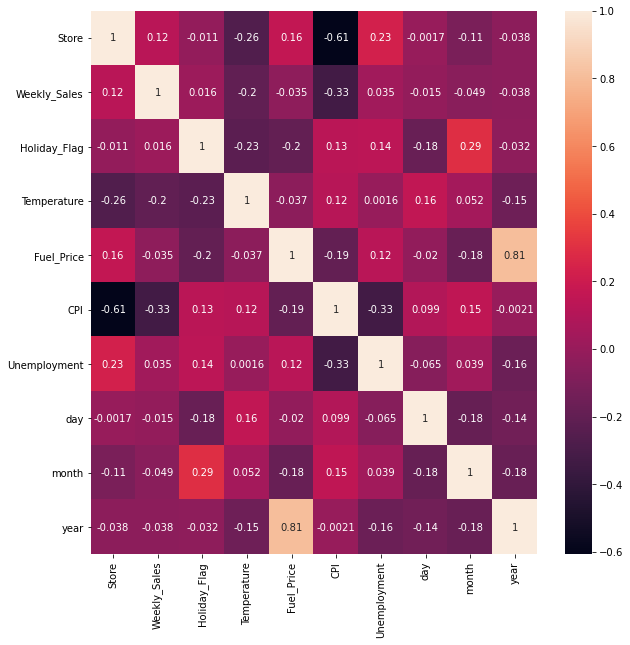

In [9]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), annot = True, ax=ax)

The 'Fuel_Price' is strong correlated to 'Year', and the 'Store' column with the 'CPI'. <br/>
One column of each pair must be dropped else they would carry similar information to the model. 'Year' and 'Store' will not be dropped.

Other variables that have weak correlation with 'Weekly_Sales' can be analyzed to see if they are useful.

In [10]:
# Removing Fuel_Price and CPI columns
dataset = dataset.drop(['Fuel_Price', 'CPI'], axis = 1)

### <span style="color:green">Relationship between Features and Weekly Sales</span>

####  <span style="text-decoration:underline">Numerical features</span>


In [11]:
# Returing the 5 fist columns of our dataset
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,7.658,Sunday,6,3,2011


The Holiday Flag column is binary with values 0 and 1. For this reason we will behave like it is categorical feature.

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


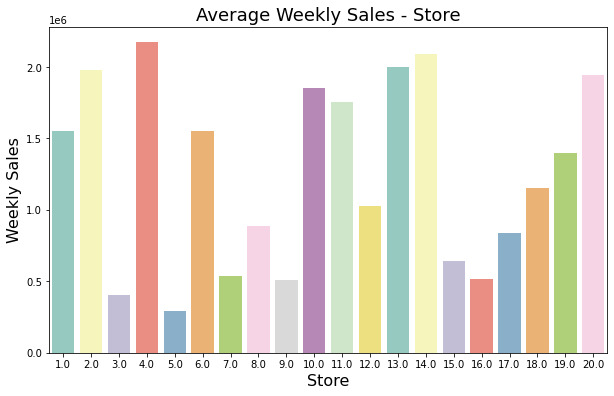

In [12]:
#Grouping weekly_sales per store
weekly_sales = dataset.groupby('Store')['Weekly_Sales'].mean() 

#Ploting Average Weekly Sales per Store
plt.figure(figsize=(10,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='Set3')

#plt.grid()
plt.title('Average Weekly Sales - Store', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

As we were expecting, the Sales are different depending the Store.

In [13]:
# Ploting Weekly Sales depending on the Temperature
fig = px.scatter(dataset, x = 'Temperature', y = 'Weekly_Sales', color = 'Weekly_Sales', title= 'Weekly Sales - Temperature')
fig.update_layout(
    title={
        'text': 'Weekly Sales - Temperature',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="iframe")

The Temperature does not have a big effect at the sales, besides lower than 30 Fahrenheit where the sales have dropped dramatically, possibly an outlier, the correlation does not seem to change.

In [14]:
# Ploting Weekly Sales depending on the Unemployment
fig = px.scatter(dataset, x = 'Unemployment', y = 'Weekly_Sales', color = 'Weekly_Sales')
fig.update_layout(
    title={
        'text': 'Weekly Sales - Unemployment',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="iframe")

The above chart indicates that most of the data points are clustered in the half of the plot. The points located to the extreme right of the x -axis indicate outliers.

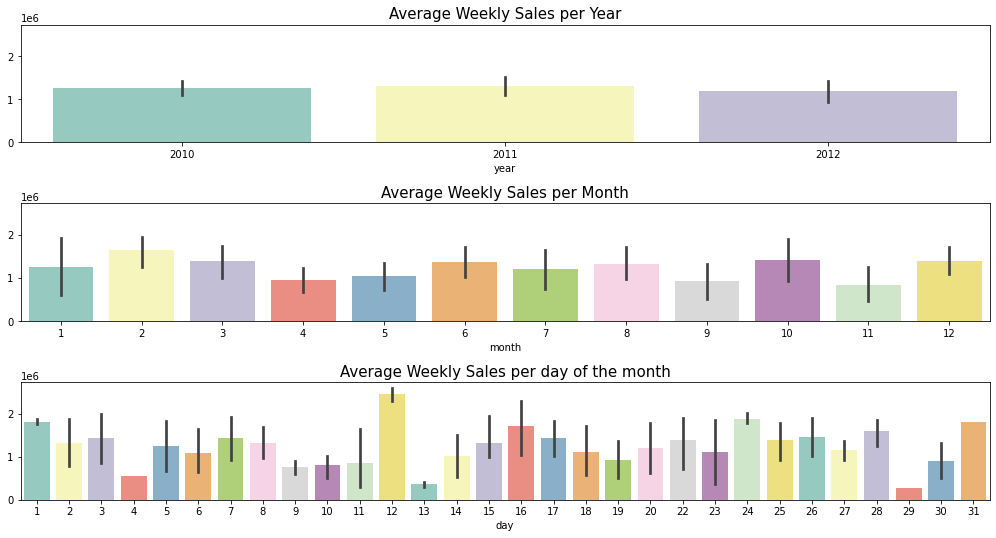

<Figure size 720x720 with 0 Axes>

In [15]:
# Plotting Week Sales depending on different time variables

# Fixing the parameters for the subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharey=True)
plt.figure(figsize=(10,10))
fig.tight_layout(pad=4.0)

# Years
sns.barplot(ax=axes[0], x=dataset['year'], y=dataset['Weekly_Sales'].values, palette='Set3')
axes[0].set_title('Average Weekly Sales per Year', fontsize=15)

# Month
sns.barplot(ax=axes[1], x=dataset['month'], y=dataset['Weekly_Sales'].values, palette='Set3' )
axes[1].set_title('Average Weekly Sales per Month', fontsize=15)


# Day of month
sns.barplot(ax=axes[2], x=dataset['day'], y=dataset['Weekly_Sales'].values, palette='Set3' )
axes[2].set_title('Average Weekly Sales per day of the month', fontsize=15)

plt.show()

The sales are different depending the day of the week and the month. In yearly overall we do not notice any change in the sales, so we do not need the 'year' column.

###  Outliers


In [16]:
# Seperating numerical features 
numerical_features = dataset[['Store', 'Temperature', 'Unemployment', 'day', 'month']]
numerical_features.head()

,Store,Temperature,Unemployment,day,month
0,6.0,59.61,6.858,18,2
1,13.0,42.38,7.470,25,3
4,6.0,78.89,7.092,28,5
5,4.0,NaN,7.896,28,5
6,15.0,69.80,7.658,6,3


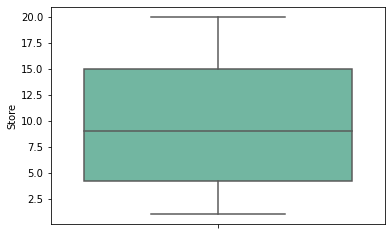

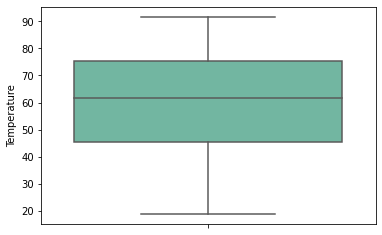

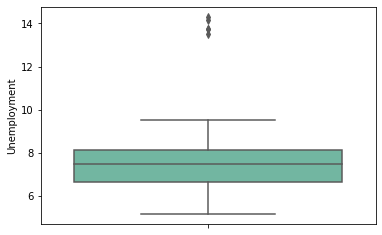

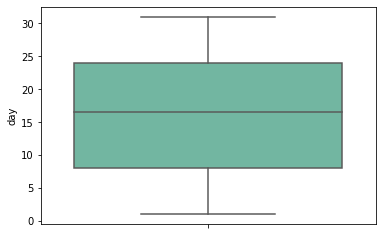

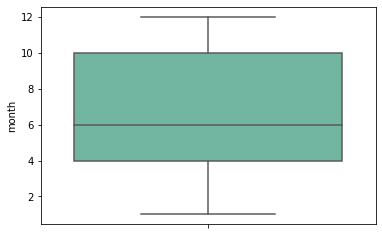

In [17]:
# Ploting outliers
for feature in numerical_features:
    sns.boxplot(y=feature, data=numerical_features, palette='Set2')
    plt.show()

From the box plots above we see that the column 'Unemployment' has outliers. It is not surprising since we could notice them at the scatter plot Unemployment - Weekly Sales too.

Althought at the Weekly-Sales Temperature scatter plot we notice variables that propably are outliers, here we do not see any. At any case we will consider as outliers all the numerical values that do not fall within the range:  [𝑋¯−3𝜎,𝑋¯+3𝜎] .

In [18]:
# Removing Outliers from Unemployed column
to_keep = dataset['Unemployment'] < dataset['Unemployment'].mean() + 3*dataset['Unemployment'].std()
dataset = dataset.loc[to_keep,:]
print('Done. Number of lines remaining : ', dataset.shape[0])

Done. Number of lines remaining :  102


In [19]:
# Removing Outliers from Temperature column
#to_keep = dataset['Temperature'].mean() - 3*dataset['Temperature'].std() < dataset['Temperature']
#dataset = dataset.loc[to_keep,:]
#print('Done. Number of lines remaining : ', dataset.shape[0])

####   <span style="text-decoration:underline">Categorical features</span>

In [20]:
# Seperating categorical features 
categorical_features = dataset[['Holiday_Flag', 'day_of_week']]
categorical_features

,Holiday_Flag,day_of_week
0,NaN,Friday
1,0.0,Friday
4,0.0,Friday
5,0.0,Friday
6,0.0,Sunday
...,...,...
142,0.0,Sunday
143,0.0,Tuesday
144,0.0,Friday
145,0.0,Friday


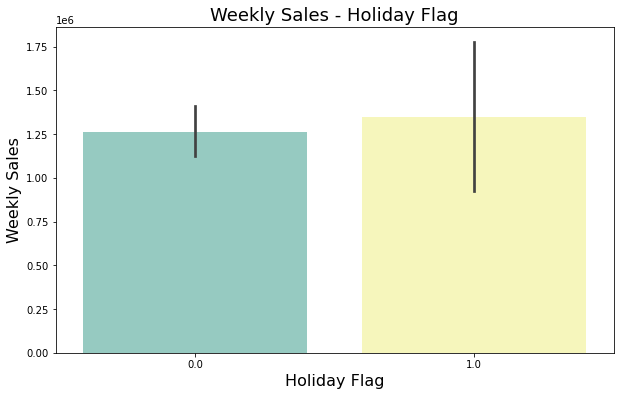

In [21]:
#Ploting Weekly Sales in Holiday and non Holiday days
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['Holiday_Flag'], y=dataset['Weekly_Sales'].values, palette='Set3' )

#plt.grid()
plt.title('Weekly Sales - Holiday Flag', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Holiday Flag', fontsize=16)
plt.show()

The sales are not different during the holiday period and the non holiday period, so we can remove this column since it does not have an impact to Weekly Sales.

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



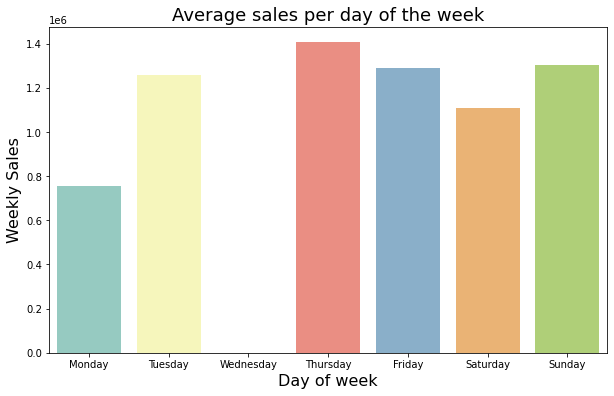

In [22]:
# Average sales per day of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = dataset['Weekly_Sales'].groupby(categorical_features['day_of_week']).mean().reindex(order) 

plt.figure(figsize=(10,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='Set3')

plt.title('Average sales per day of the week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Day of week', fontsize=16)
plt.show()

There were sales on Wednesday! Interestingly, on Tuesday we notice the most sales, and after Thursday, Friday and Sunday follows almost equally.

C:\Users\elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



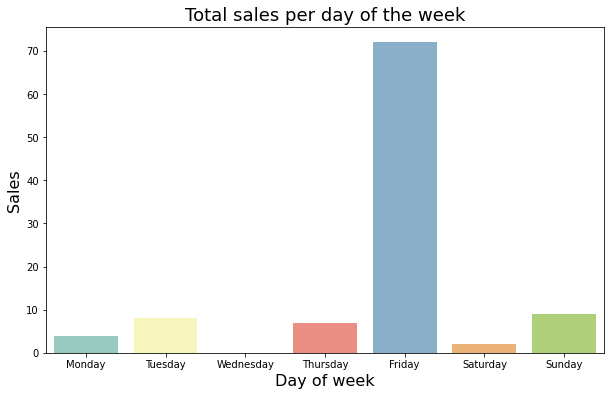

In [23]:
# Total sales per day of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = dataset['Weekly_Sales'].groupby(categorical_features['day_of_week']).count().reindex(order) 

plt.figure(figsize=(10,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='Set3')

plt.title('Total sales per day of the week', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Day of week', fontsize=16)
plt.show()

Even if on Thursday, Friday and Sunday we had in average the same weekly sales, on Fridays the total sales are much more than any other day.